# Problem 1

## Load the datasets

In [1]:
import pandas as pd
import numpy as np

table = pd.read_table('./ml-100k/u.data', names=['user_id', 'item_id', 'rating', 'timestamp'], lineterminator='\n')
train = pd.read_table('./ml-100k/ua.base', names=['user_id', 'item_id', 'rating', 'timestamp'], lineterminator='\n')
test = pd.read_table('./ml-100k/ua.test', names=['user_id', 'item_id', 'rating', 'timestamp'], lineterminator='\n')

## Plot the histogram

In [2]:
import matplotlib.pyplot as plt
import matplotlib
# matplotlib.style.use('ggplot')
%matplotlib inline

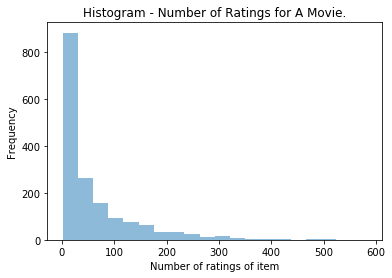

In [3]:
# Set the data
n_item = table['item_id'].max()
n_ratings_item = []

for i in range(1, n_item + 1):
    n = len(table[table["item_id"] == i])
    n_ratings_item.append(n)

# Set the histogram
n, bins, patches = plt.hist(n_ratings_item, 20, alpha = 0.5)

plt.xlabel('Number of ratings of item')
plt.ylabel('Frequency')
plt.title("Histogram - Number of Ratings for A Movie.")

plt.show()

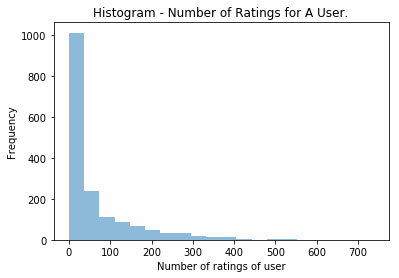

In [4]:
# Set the data
n_user = table['user_id'].max()
n_ratings_user = []

for i in range(1, n_item + 1):
    n = len(table[table["user_id"] == i])
    n_ratings_user.append(n)

# Set the histogram
n, bins, patches = plt.hist(n_ratings_user, 20, alpha = 0.5)

plt.xlabel('Number of ratings of user')
plt.ylabel('Frequency')
plt.title("Histogram - Number of Ratings for A User.")

plt.show()

## Recommender - Baseline Predictor

In [5]:
# Create the user-item matrix
train_matrix = np.zeros((n_user, n_item))
test_matrix = np.zeros((n_user, n_item))

# Fill the matrix with the ratings
def fill_matrix(matrix, data):
    row, col = matrix.shape
    for u in range(1, row + 1):
        items = data[data['user_id'] == u]
        for index in items.index:
            df = items.loc[index]
            i = df['item_id']
            matrix[u - 1, i - 1] = df['rating']  
            
fill_matrix(train_matrix, train)
fill_matrix(test_matrix, test)

In [6]:
# Compute overall average rating
mu = train['rating'].mean()

# Set the values of regularizers
lambda_2 = 25
lambda_3 = 10

# Compute deviation of user and item
def compute(mu, data, lmd, arr, row, r):
    temp = data.copy()
    bias = np.tile(arr, [row, 1])
    flag = data > 0
    temp[flag] = data[flag] - mu - bias[flag]
    ans = temp.sum(axis = r) / (flag.sum(axis = r) + lmd)
    return ans

bi = compute(mu, train_matrix, lambda_2, np.zeros(n_item), n_user, 0)
bu = compute(mu, train_matrix, lambda_3, bi, n_user, 1)

### Part (a) Compute the RMSE for baseline predictor

In [7]:
# Compute the mean square error
import math

def computeRMSE(data, u_list, mu, bi, bu):
    user, item = np.where(data != 0)
    
    RMSE_sum = 0
    num = len(user)
    for r in range(num):
        i = item[r]
        u_test = user[r]
        u = u_list[u_test]
        RMSE_sum += math.pow(mu + bi[i] + bu[u] - data[u_test, i], 2)
        
    RMSE_value = math.pow(RMSE_sum / num, 0.5)
    return RMSE_value

RMSE_test = computeRMSE(test_matrix, range(n_user), mu, bi, bu)

print(RMSE_test)

0.9664817838879254


### Part (c) Plot the RMSE per user

In [8]:
# Compute the average rating of each user
avg_user_rating = []
for i in range(n_user):
    arr = train_matrix[i, :]
    avg_rating = sum(arr) / len(np.where(arr != 0)[0])
    avg_user_rating.append(avg_rating)

# print(max(avg_user_rating))
# print(min(avg_user_rating))

In [9]:
# Split the user based on their average rating
max_user_avg = max(avg_user_rating)
min_user_avg = min(avg_user_rating)
step = (max_user_avg - min_user_avg) / 5

user_list1 = []
user_list2 = []
user_list3 = []
user_list4 = []
user_list5 = []

for i in range(len(avg_user_rating)):
    if avg_user_rating[i] <= (min_user_avg + step):
        user_list1.append(i)
    elif (min_user_avg + step) < avg_user_rating[i] <= (min_user_avg + step * 2):
        user_list2.append(i)
    elif (min_user_avg + step * 2) < avg_user_rating[i] <= (min_user_avg + step * 3):
        user_list3.append(i)
    elif (min_user_avg + step * 3) < avg_user_rating[i] <= (min_user_avg + step * 4):
        user_list4.append(i)
    else:
        user_list5.append(i)

In [10]:
# Compute RMSE based on these subsets of users
# For type 1
part_1 = test_matrix[user_list1, :]
RMSE_part_1 = computeRMSE(part_1, user_list1, mu, bi, bu)
print("RMSE for category 1:", RMSE_part_1)

# For type 2
part_2 = test_matrix[user_list2, :]
RMSE_part_2 = computeRMSE(part_2, user_list2, mu, bi, bu)
print("RMSE for category 2:", RMSE_part_2)

# For type 3
part_3 = test_matrix[user_list3, :]
RMSE_part_3 = computeRMSE(part_3, user_list3, mu, bi, bu)
print("RMSE for category 3:", RMSE_part_3)

# For type 4
part_4 = test_matrix[user_list4, :]
RMSE_part_4 = computeRMSE(part_4, user_list4, mu, bi, bu)
print("RMSE for category 4:", RMSE_part_4)

# For type 5
part_5 = test_matrix[user_list5, :]
RMSE_part_5 = computeRMSE(part_5, user_list5, mu, bi, bu)
print("RMSE for category 5:", RMSE_part_5)

RMSE for category 1: 1.108865965786421
RMSE for category 2: 1.1508343053085417
RMSE for category 3: 1.0007633817384751
RMSE for category 4: 0.9264089800064111
RMSE for category 5: 0.8878669173390428


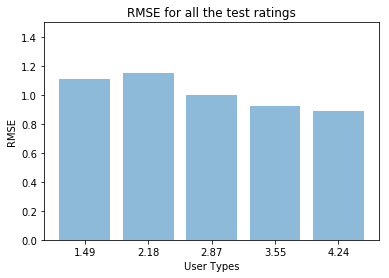

In [11]:
# Plot the histogram for different types of users
RMSE_test_ratings = [RMSE_part_1, RMSE_part_2, RMSE_part_3, RMSE_part_4, RMSE_part_5]
index = np.arange(5)
# plt.figure(figsize=(10, 5))
rects = plt.bar(index, RMSE_test_ratings, alpha=0.5)  

plt.xlabel('User Types') 
plt.ylabel('RMSE')
plt.title('RMSE for all the test ratings') 
plt.xticks(index, (str(round((min_user_avg),2)), str(round((min_user_avg + step),2)), 
                   str(round((min_user_avg + 2*step),2)), str(round((min_user_avg + 3*step),2)), 
                   str(round((min_user_avg + 4*step),2)))) 
plt.ylim(0, 1.5)
plt.show()

## Recommender -  K-nearest neighbor

### Compute the similarity matrix

In [12]:
# Compute the similarity matrix
def similarity(data, avg, n):
    matrix = np.zeros((n, n))
    
    print("Computing the similarity matrix...")
    for i in range(n):
        if i % 100 == 0:
            print(i)
        for j in range(i + 1, n):
            user_1 = np.where(data[:, i] != 0)[0]
            user_2 = np.where(data[:, j] != 0)[0]
            common = np.intersect1d(user_1, user_2)
            if len(common) == 0:
                matrix[i, j] = 0.00001
            else:
                avg_rating = np.array(avg)[common]
                diff_1 = data[common, i] - avg_rating
                diff_2 = data[common, j] - avg_rating
                numerator = np.dot(diff_1, diff_2)
                if numerator == 0:
                    matrix[i, j] = 0.00001
                else: 
                    denominator_left = np.dot(diff_1, diff_1)
                    denominator_right = np.dot(diff_2, diff_2)
                    matrix[i, j] = numerator / (math.pow(denominator_left * denominator_right, 0.5) + 0.00001)
    matrix = matrix + matrix.T
    print("Done!")
    return matrix

In [13]:
matrix_sim = similarity(train_matrix, avg_user_rating, n_item)

Computing the similarity matrix...
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
Done!


### Part (a). Compute RMSE for kNN

In [14]:
def computeKNN(train, test, u_list, k, matrix):
    user_list, item_list = np.where(test != 0)
    
    RMSE_sum = 0
    n = len(user_list)
    for i in range(n):
        user = u_list[user_list[i]] # Get the index of user in train set
        user_test = user_list[i] # Get the index of user in test set
        item = item_list[i]
        
        # Find top k similar items
        user_item = np.where(train[user, :] != 0)[0]
        similarity = matrix[user_item, item]
        top_k_index = np.argsort(-similarity)[:k]
        top_k = user_item[top_k_index]
        
        # Predict rating
        numerator = np.dot(matrix[item, top_k], train[user, top_k])
        denominator = sum(abs(matrix[item, top_k]))
        rating = numerator / denominator
        
        RMSE_sum += math.pow(rating - test[user_test, item], 2)
        
    RMSE_value = math.pow(RMSE_sum / n, 0.5) 
    
    return RMSE_value

In [16]:
RMSE_K_1 = computeKNN(train_matrix, test_matrix, range(n_user), 1, matrix_sim)
print("Result for RMSE_K_1:", RMSE_K_1)

RMSE_K_2 = computeKNN(train_matrix, test_matrix, range(n_user), 2, matrix_sim)
print("Result for RMSE_K_2:", RMSE_K_2)

RMSE_K_3 = computeKNN(train_matrix, test_matrix, range(n_user), 3, matrix_sim)
print("Result for RMSE_K_3:", RMSE_K_3)

RMSE_K_5 = computeKNN(train_matrix, test_matrix, range(n_user), 5, matrix_sim)
print("Result for RMSE_K_5:", RMSE_K_5)

RMSE_K_10 = computeKNN(train_matrix, test_matrix, range(n_user), 10, matrix_sim)
print("Result for RMSE_K_10:", RMSE_K_10)

Result for RMSE_K_1: 1.372700043079869
Result for RMSE_K_2: 1.1850536760728045
Result for RMSE_K_3: 1.1179322309306872
Result for RMSE_K_5: 1.0758275282280463
Result for RMSE_K_10: 1.328797652326211


Obviously, k = 5 is the optimal one

### Part (c). Plot the RMSE per user

### k = 1

In [17]:
# For type 1
RMSE_part_1_k_1 = computeKNN(train_matrix, part_1, user_list1, 1, matrix_sim)
print("Result for RMSE_part_1:", RMSE_part_1_k_1)

# For type 2
RMSE_part_2_k_1 = computeKNN(train_matrix, part_2, user_list2, 1, matrix_sim)
print("Result for RMSE_part_2:", RMSE_part_2_k_1)

# For type 3
RMSE_part_3_k_1 = computeKNN(train_matrix, part_3, user_list3, 1, matrix_sim)
print("Result for RMSE_part_3:", RMSE_part_3_k_1)

# For type 4
RMSE_part_4_k_1 = computeKNN(train_matrix, part_4, user_list4, 1, matrix_sim)
print("Result for RMSE_part_4:", RMSE_part_4_k_1)

# For type 5
RMSE_part_5_k_1 = computeKNN(train_matrix, part_5, user_list5, 1, matrix_sim)
print("Result for RMSE_part_5:", RMSE_part_5_k_1)

Result for RMSE_part_1: 1.5110702608857516
Result for RMSE_part_2: 1.5748015748023623
Result for RMSE_part_3: 1.4494196903216465
Result for RMSE_part_4: 1.319123272062377
Result for RMSE_part_5: 1.0954451150103321


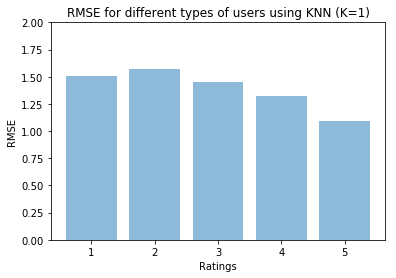

In [18]:
RMSE_test_ratings = [RMSE_part_1_k_1, RMSE_part_2_k_1, RMSE_part_3_k_1, RMSE_part_4_k_1, RMSE_part_5_k_1]
index = np.arange(5)
rects = plt.bar(index, RMSE_test_ratings, alpha=0.5)  

plt.xlabel('Ratings') 
plt.ylabel('RMSE')
plt.title('RMSE for different types of users using KNN (K=1)') 
plt.xticks(index, ('1', '2', '3', '4', '5')) 
plt.ylim(0, 2.0) 

plt.show()

### k = 2

In [19]:
# For type 1
# part_1 = test_matrix[user_list1]
RMSE_part_1_k_2 = computeKNN(train_matrix, part_1, user_list1, 2, matrix_sim)
print("Result for RMSE_part_1:", RMSE_part_1_k_2)

# For type 2
# part_2 = test_matrix[user_list2]
RMSE_part_2_k_2 = computeKNN(train_matrix, part_2, user_list2, 2, matrix_sim)
print("Result for RMSE_part_2:", RMSE_part_2_k_2)

# For type 3
# part_3 = test_matrix[user_list3]
RMSE_part_3_k_2 = computeKNN(train_matrix, part_3, user_list3, 2, matrix_sim)
print("Result for RMSE_part_3:", RMSE_part_3_k_2)

# For type 4
# part_4 = test_matrix[user_list4]
RMSE_part_4_k_2 = computeKNN(train_matrix, part_4, user_list4, 2, matrix_sim)
print("Result for RMSE_part_4:", RMSE_part_4_k_2)

# For type 5
# part_5 = test_matrix[user_list5]
RMSE_part_5_k_2 = computeKNN(train_matrix, part_5, user_list5, 2, matrix_sim)
print("Result for RMSE_part_5:", RMSE_part_5_k_2)

Result for RMSE_part_1: 1.3731113742871752
Result for RMSE_part_2: 1.4283978782820157
Result for RMSE_part_3: 1.2457298772478758
Result for RMSE_part_4: 1.1296941956638067
Result for RMSE_part_5: 0.9875436360937534


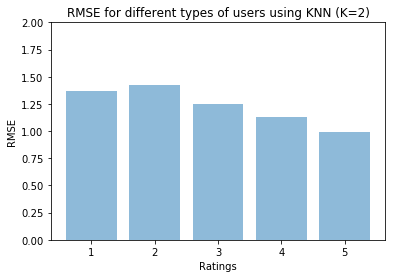

In [20]:
RMSE_test_ratings = [RMSE_part_1_k_2, RMSE_part_2_k_2, RMSE_part_3_k_2, RMSE_part_4_k_2, RMSE_part_5_k_2]
index = np.arange(5)
rects = plt.bar(index, RMSE_test_ratings, alpha=0.5)  

plt.xlabel('Ratings') 
plt.ylabel('RMSE')
plt.title('RMSE for different types of users using KNN (K=2)') 
plt.xticks(index, ('1', '2', '3', '4', '5')) 
plt.ylim(0, 2.0) 

plt.show()

### k = 3

In [21]:
# For type 1
# part_1 = test_matrix[user_list1]
RMSE_part_1_k_3 = computeKNN(train_matrix, part_1, user_list1, 3, matrix_sim)
print("Result for RMSE_part_1:", RMSE_part_1_k_3)

# For type 2
# part_2 = test_matrix[user_list2]
RMSE_part_2_k_3 = computeKNN(train_matrix, part_2, user_list2, 3, matrix_sim)
print("Result for RMSE_part_2:", RMSE_part_2_k_3)

# For type 3
# part_3 = test_matrix[user_list3]
RMSE_part_3_k_3 = computeKNN(train_matrix, part_3, user_list3, 3, matrix_sim)
print("Result for RMSE_part_3:", RMSE_part_3_k_3)

# For type 4
# part_4 = test_matrix[user_list4]
RMSE_part_4_k_3 = computeKNN(train_matrix, part_4, user_list4, 3, matrix_sim)
print("Result for RMSE_part_4:", RMSE_part_4_k_3)

# For type 5
# part_5 = test_matrix[user_list5]
RMSE_part_5_k_3 = computeKNN(train_matrix, part_5, user_list5, 3, matrix_sim)
print("Result for RMSE_part_5:", RMSE_part_5_k_3)

Result for RMSE_part_1: 1.3111708225280103
Result for RMSE_part_2: 1.3464001343471315
Result for RMSE_part_3: 1.1687501971256042
Result for RMSE_part_4: 1.0701585527758861
Result for RMSE_part_5: 0.940353205245611


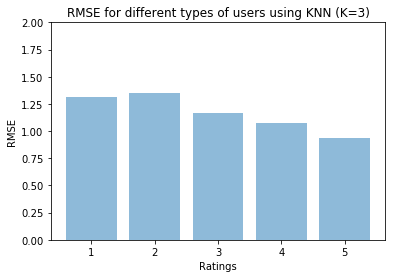

In [22]:
RMSE_test_ratings = [RMSE_part_1_k_3, RMSE_part_2_k_3, RMSE_part_3_k_3, RMSE_part_4_k_3, RMSE_part_5_k_3]
index = np.arange(5)
rects = plt.bar(index, RMSE_test_ratings, alpha=0.5)  

plt.xlabel('Ratings') 
plt.ylabel('RMSE')
plt.title('RMSE for different types of users using KNN (K=3)') 
plt.xticks(index, ('1', '2', '3', '4', '5')) 
plt.ylim(0, 2.0) 

plt.show()

### k = 5

In [23]:
# For type 1
# part_1 = test_matrix[user_list1]
RMSE_part_1_k_5 = computeKNN(train_matrix, part_1, user_list1, 5, matrix_sim)
print("Result for RMSE_part_1:", RMSE_part_1_k_5)

# For type 2
# part_2 = test_matrix[user_list2]
RMSE_part_2_k_5 = computeKNN(train_matrix, part_2, user_list2, 5, matrix_sim)
print("Result for RMSE_part_2:", RMSE_part_2_k_5)

# For type 3
# part_3 = test_matrix[user_list3]
RMSE_part_3_k_5 = computeKNN(train_matrix, part_3, user_list3, 5, matrix_sim)
print("Result for RMSE_part_3:", RMSE_part_3_k_5)

# For type 4
# part_4 = test_matrix[user_list4]
RMSE_part_4_k_5 = computeKNN(train_matrix, part_4, user_list4, 5, matrix_sim)
print("Result for RMSE_part_4:", RMSE_part_4_k_5)

# For type 5
# part_5 = test_matrix[user_list5]
RMSE_part_5_k_5 = computeKNN(train_matrix, part_5, user_list5, 5, matrix_sim)
print("Result for RMSE_part_5:", RMSE_part_5_k_5)

Result for RMSE_part_1: 1.3269868247831351
Result for RMSE_part_2: 1.3296076656903437
Result for RMSE_part_3: 1.1092028352623244
Result for RMSE_part_4: 1.0339114791384554
Result for RMSE_part_5: 0.9389476641833695


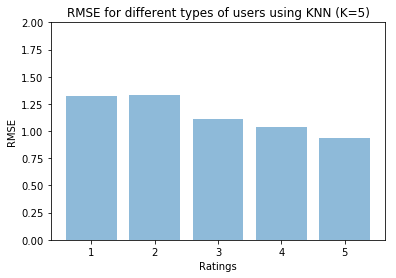

In [24]:
RMSE_test_ratings = [RMSE_part_1_k_5, RMSE_part_2_k_5, RMSE_part_3_k_5, RMSE_part_4_k_5, RMSE_part_5_k_5]
index = np.arange(5)
rects = plt.bar(index, RMSE_test_ratings, alpha=0.5)  

plt.xlabel('Ratings') 
plt.ylabel('RMSE')
plt.title('RMSE for different types of users using KNN (K=5)') 
plt.xticks(index, ('1', '2', '3', '4', '5')) 
plt.ylim(0, 2.0) 

plt.show()

### k = 10

In [25]:
# For type 1
# part_1 = test_matrix[user_list1]
RMSE_part_1_k_10 = computeKNN(train_matrix, part_1, user_list1, 10, matrix_sim)
print("Result for RMSE_part_1:", RMSE_part_1_k_10)

# For type 2
# part_2 = test_matrix[user_list2]
RMSE_part_2_k_10 = computeKNN(train_matrix, part_2, user_list2, 10, matrix_sim)
print("Result for RMSE_part_2:", RMSE_part_2_k_10)

# For type 3
# part_3 = test_matrix[user_list3]
RMSE_part_3_k_10 = computeKNN(train_matrix, part_3, user_list3, 10, matrix_sim)
print("Result for RMSE_part_3:", RMSE_part_3_k_10)

# For type 4
# part_4 = test_matrix[user_list4]
RMSE_part_4_k_10 = computeKNN(train_matrix, part_4, user_list4, 10, matrix_sim)
print("Result for RMSE_part_4:", RMSE_part_4_k_10)

# For type 5
# part_5 = test_matrix[user_list5]
RMSE_part_5_k_10 = computeKNN(train_matrix, part_5, user_list5, 10, matrix_sim)
print("Result for RMSE_part_5:", RMSE_part_5_k_10)

Result for RMSE_part_1: 1.5014625370243115
Result for RMSE_part_2: 1.8652530397935294
Result for RMSE_part_3: 1.3098744082578586
Result for RMSE_part_4: 1.2278478437658313
Result for RMSE_part_5: 1.6483973490014656


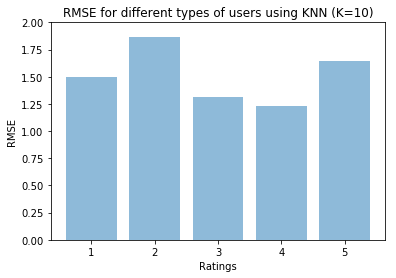

In [26]:
RMSE_test_ratings = [RMSE_part_1_k_10, RMSE_part_2_k_10, RMSE_part_3_k_10, RMSE_part_4_k_10, RMSE_part_5_k_10]
index = np.arange(5)
rects = plt.bar(index, RMSE_test_ratings, alpha=0.5)  

plt.xlabel('Ratings') 
plt.ylabel('RMSE')
plt.title('RMSE for different types of users using KNN (K=10)') 
plt.xticks(index, ('1', '2', '3', '4', '5')) 
plt.ylim(0, 2.0) 

plt.show()